<a href="https://www.kaggle.com/code/michaelsquillacioti/bellabeat-case-study?scriptVersionId=158498665" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Scenario

You are a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fttness data could help unlock new growth opportunities for the company. You have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat executive team along with your high-level recommendations for Bellabeat’s marketing strategy.

**Objective:** 
Identify how smart devices are most commonly used, and determine how Bellabeat's strategy should focus on those roles.

# Data Source

The data source for this analysis is the [FitBit Fitness Tracker dataset](https://www.kaggle.com/datasets/arashnic/fitbit) hosted by Mobius. This Kaggle data set contains personal fitness tracker data from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

# Preparing the Data

**Data Concerns:**
The sample is small (30 users) and somewhat outdated (2016). The data would have been more beneficial if it included the user’s sex, as Bellabeat specifically markets towards women. Furthermore, a year-long study would have provided insight into how users' behaviors are influenced by the season.

**Cleaning and Merging data:**
After reviewing the dataset, the two most useful documents were determined to be those which merged several others together. The data in these two documents, *dailyActivity_merged.csv* and *sleepDay_merged.csv*, were then cleaned. 

Because each user's *Id* was present multiple times in each of the documents, it was decided that an additional column would be necessary to more easily organize the data by a single key, *IdAndDate*. In the case of the *dailyActivity_merged.csv* file, this new *IdAndDate* simply concatenated the *Id* value to the *ActivityDate* value with an underscore in between (ex: a row with *Id* of "1503960366" and *ActivityDate* of "4/12/2016" produced *IdAndDate* of "1503960366_4/12/2016"). 
However, the *sleepDay_merged.csv* file required an extra step of removing the time portion of each *SleepDay* value within Microsoft Excel (ex: a *SleepDay* of "4/12/2016 12:00:00 AM" became simply "4/12/2016"). Then, *IdAndDate* was created by concatenating the *Id* value to the *SleepDay* value with an underscore in between. 

These two files were then merged through the following SQL script, which also added new columns for *DayOfWeek* and *DayOfWeekNumber* (a *DayOfWeekNumber* value of "1" would correspond with a *DayOfWeek* value of "Sunday"). Due to the nature of the INNER JOIN, this new file has only 24 users.

In [ ]:
SELECT 
 activity_data.*,
 format_timestamp('%A',ActivityDate) AS DayOfWeek,
 extract(dayofweek from ActivityDate) AS DayOfWeekNumber,
 sleep_data.TotalMinutesAsleep,
 sleep_data.TotalSleepRecords,
 sleep_data.TotalTimeInBed

FROM `case-study-bellabeat-409718.Fitbit_user_data.activity_data` AS activity_data
INNER JOIN 
  `case-study-bellabeat-409718.Fitbit_user_data.sleep_data` AS sleep_data ON 
  activity_data.IdAndDate = sleep_data.IdAndDate
ORDER BY IdAndDate

In the SQL script above, 'case-study-bellabeat-409718.Fitbit_user_data.activity_data' corresponds to the cleaned version of the *dailyActivity_merged.csv* file, while the other corresponds to the cleaned version of the *sleepDay_merged.csv* file. The resulting data file was titled *Activity_and_Sleep_Merged_Cleaned.csv*, and it was then cleaned using Excel's Remove Duplicates feature. 

# Analyzing the Data

**Analyzing per User:** 
In order to obtain a better understanding of each individual's FitBit usage, the data was organized using BigQuery and the following SQL code:

In [ ]:
SELECT 
  Id,
  AVG(Calories) AS Avg_Calories,

  AVG(TotalSteps) AS Avg_TotalSteps,
  AVG(TotalDistance) AS Avg_TotalDistance,
  AVG(VeryActiveDistance) AS Avg_VeryActiveDistance,
  AVG(ModeratelyActiveDistance) AS Avg_ModeratelyActiveDistance,
  AVG(LightActiveDistance) AS Avg_LightActiveDistance,
  AVG(SedentaryActiveDistance) AS Avg_SedentaryActiveDistance,

  AVG(VeryActiveMinutes) AS Avg_VeryActiveMinutes,
  AVG(FairlyActiveMinutes) AS Avg_FairlyActiveMinutes,
  AVG(LightlyActiveMinutes) AS Avg_LightlyActiveMinutes,
  AVG(SedentaryMinutes) AS Avg_SedentaryMinutes,

  AVG(TotalMinutesAsleep) AS Avg_TotalMinutesAsleep,
  AVG(TotalTimeInBed) AS Avg_TotalTimeInBed,

FROM `case-study-bellabeat-409718.Fitbit_user_data.Activity_and_Sleep_Merged_Cleaned`
GROUP BY Id
ORDER BY Id ASC

This data was then analyzed using Tableau, where it was utilized to develop visualizations for both the Average Sleep/Activity Time and Average Activity Distance of each user:

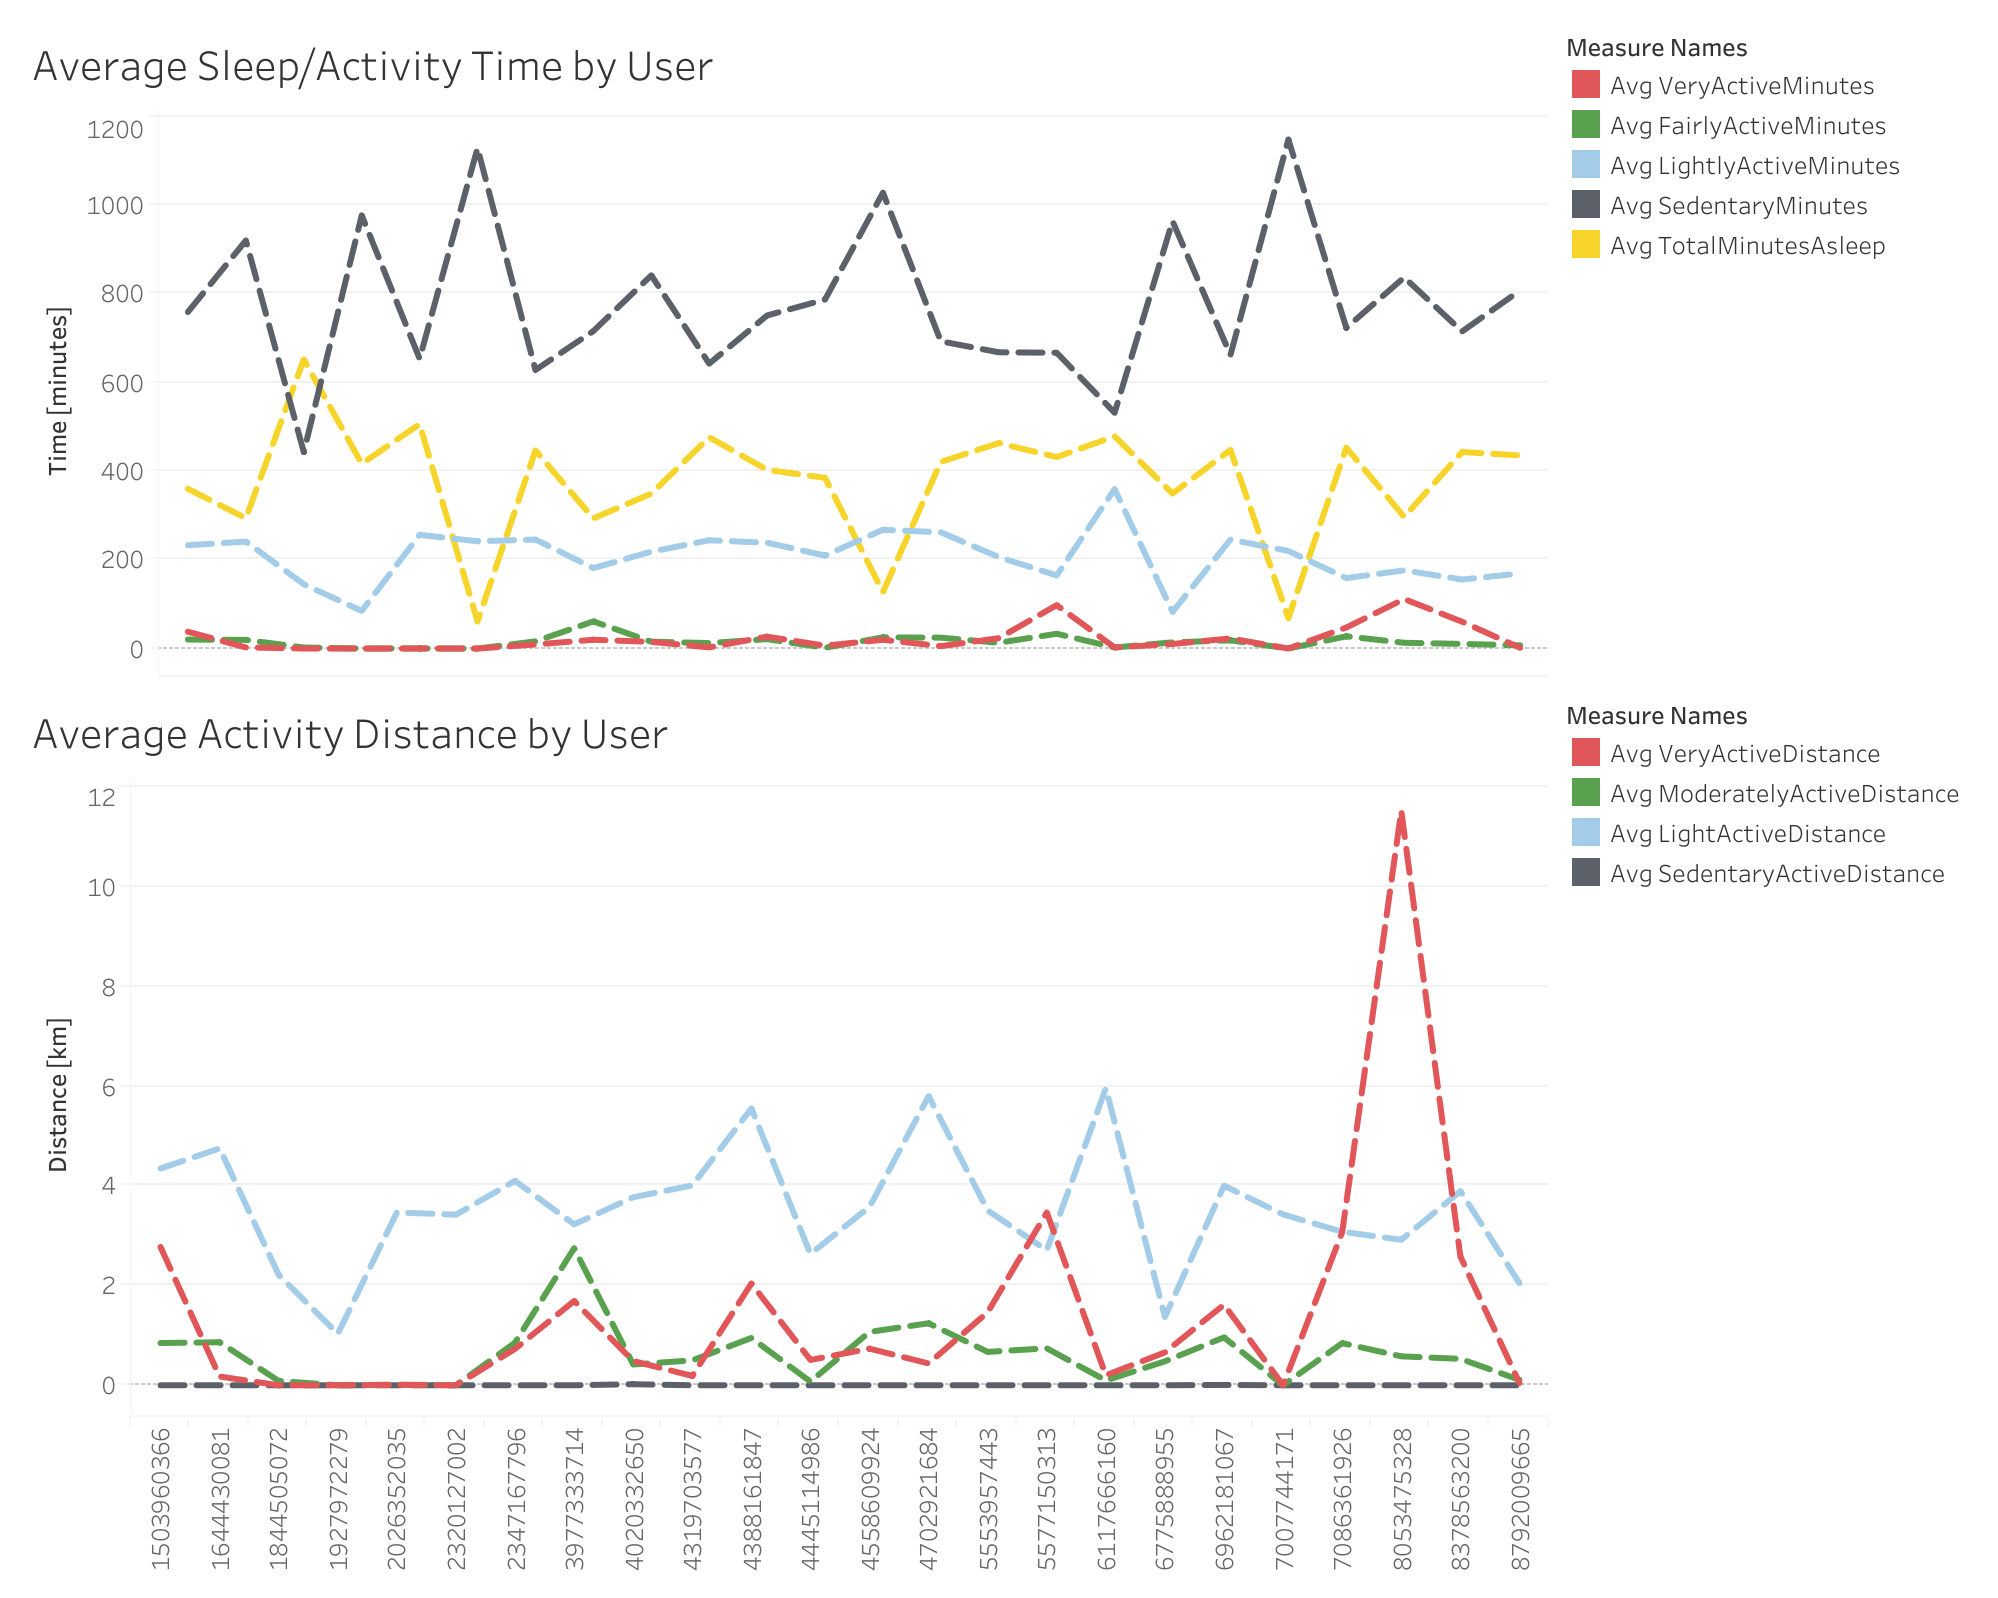

As shown in the above graphs, most of these 24 users spent very little time on average being "Moderately Active" or "Very Active". Only 2 users appear to have consistently spent extensive time within the "Very Active" range. Based on these observations, it can be concluded that most of the FitBit users within this study exercised minimally and at a casual level. 

**Analyzing per Day of the Week:**
Understanding weekly habits is another useful strain of information. Therefore, the same data from before was reorganized via BigQuery and the following SQL code, in order to see how behavior fluctuated throughout the week. This query followed the same structure, only this time it was organized by the day of the week, instead of the individual user. 

In [ ]:
SELECT 
  DayOfWeekNumber, 
  AVG(Calories) AS Avg_Calories,

  AVG(TotalSteps) AS Avg_TotalSteps,
  AVG(TotalDistance) AS Avg_TotalDistance,
  AVG(VeryActiveDistance) AS Avg_VeryActiveDistance,
  AVG(ModeratelyActiveDistance) AS Avg_ModeratelyActiveDistance,
  AVG(LightActiveDistance) AS Avg_LightActiveDistance,
  AVG(SedentaryActiveDistance) AS Avg_SedentaryActiveDistance,

  AVG(VeryActiveMinutes) AS Avg_VeryActiveMinutes,
  AVG(FairlyActiveMinutes) AS Avg_FairlyActiveMinutes,
  AVG(LightlyActiveMinutes) AS Avg_LightlyActiveMinutes,
  AVG(SedentaryMinutes) AS Avg_SedentaryMinutes,

  AVG(TotalMinutesAsleep) AS Avg_TotalMinutesAsleep,
  AVG(TotalTimeInBed) AS Avg_TotalTimeInBed,

FROM `case-study-bellabeat-409718.Fitbit_user_data.Activity_and_Sleep_Merged_Cleaned`
GROUP BY DayOfWeekNumber
ORDER BY DayOfWeekNumber

Once again, the data from the SQL query was then used to develop visualizations in Tableau. The following graphs plot the average of activity level by the duration and distance for each day of the week, where the x-axis values correspond to a day (ex: 1 = Sunday, etc.).

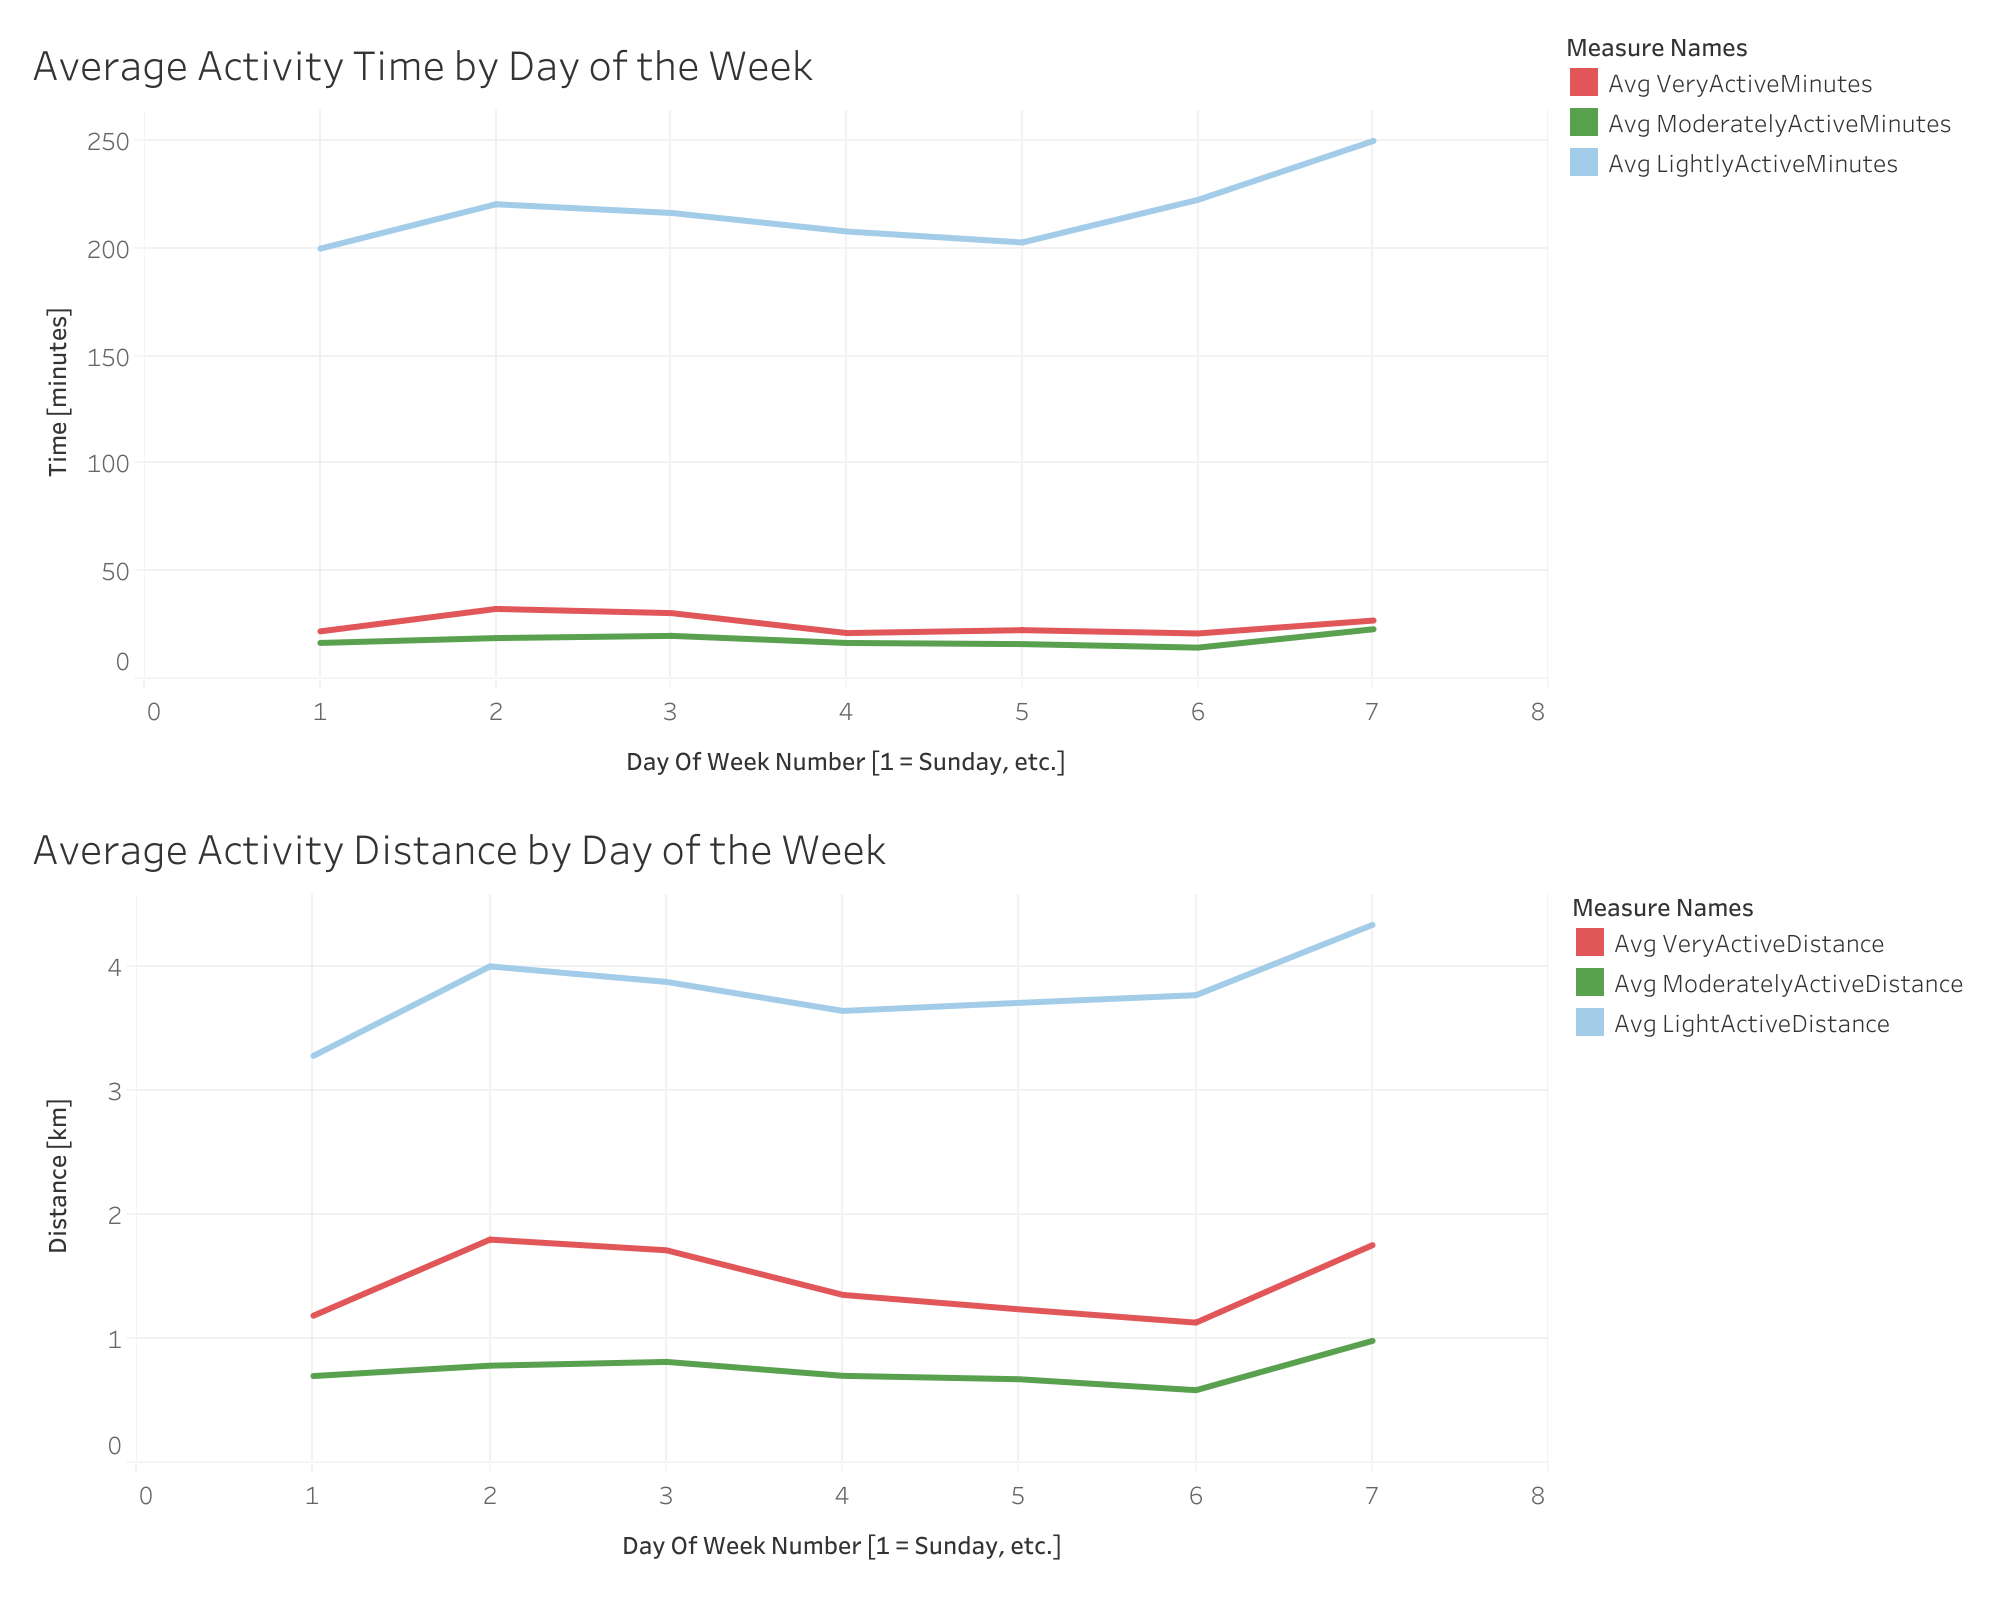

Based on the graphs above, the FitBit users tended to be most active on Mondays and Saturday, and least active on Sundays. This again hints at the likelihood that most users are casual exercisers, rather than committed athletes who would likely have higher intensity training throughout the entire week. 

# Conclusion and Recommendations

After fully analyzing the FitBit Fitness Tracker dataset, it is my recommendation that more data be obtained before advising Bellabeat to make any changes to business strategy or marketing. In addition to being outdated and reliant on too small a sample, this data lacks several other helpful traits. First, the data should include the user's sex, as Bellabeat specifically markets towards women. Additionally, the data needs to cover a longer time span, preferably a full year so that activity patterns can be monitored through each season. Lastly, the addition of user age data would greatly improve Bellabeat's ability to market effectively through the relevant means and social media platforms. In conclusion, while this dataset does provide insight into a small sample's activity levels and sleep, it is insufficient to make significant strategic recommendations without further research. However, in the event that further data echoes these same trends, my recommendation would be to focus marketing on casual exercisers rather than on serious athletes. 